# NSA Challenge

In [129]:
import pandas as pd 
import numpy as np
from datetime import datetime

In [130]:
df = pd.read_csv('logins.txt.gz', compression='gzip', sep="\t", parse_dates=[[0,1]], header=None)
df[["First Letter", "Name"]] = df[2].str.split(".", expand=True)

In [131]:
df = df.rename(columns={'0_1':'Date_Time', 2:'Username', 3:'Action'})

In [132]:
df

,Date_Time,Username,Action,First Letter,Name
0,2021-01-01 00:00:00,s.matta,OUT,s,matta
1,2021-01-01 00:05:00,s.paige,OUT,s,paige
2,2021-01-01 01:52:00,t.goldschmidt,OUT,t,goldschmidt
3,2021-01-01 01:54:00,t.hardin,OUT,t,hardin
4,2021-01-01 02:40:00,c.elson,OUT,c,elson
...,...,...,...,...,...
3771147,2022-03-18 00:53:00,m.ponds,OUT,m,ponds
3771148,2022-03-18 16:54:00,m.ponds,IN,m,ponds
3771149,2022-03-19 00:57:00,m.ponds,OUT,m,ponds
3771150,2022-03-22 16:54:00,m.ponds,IN,m,ponds


### Retirement Home

In [133]:
df = df.sort_values(by=['Username', 'Date_Time'])
df = df.reset_index(drop=True)
df

,Date_Time,Username,Action,First Letter,Name
0,2021-01-02 02:59:00,a.1,OUT,a,1
1,2021-01-02 19:03:00,a.1,IN,a,1
2,2021-01-03 03:01:00,a.1,OUT,a,1
3,2021-01-03 18:58:00,a.1,IN,a,1
4,2021-01-04 03:03:00,a.1,OUT,a,1
...,...,...,...,...,...
3771147,2021-12-28 16:33:00,z.yasso,OUT,z,yasso
3771148,2021-12-29 08:24:00,z.yasso,IN,z,yasso
3771149,2021-12-29 16:26:00,z.yasso,OUT,z,yasso
3771150,2021-12-30 08:28:00,z.yasso,IN,z,yasso


In [134]:
# Initialize a column of the time since the user's last action
df['Last_Action'] = df['Date_Time'].diff()

In [135]:
df.drop_duplicates(subset=['Username'], keep='first')['Last_Action']=None

C:\Users\emg3m\AppData\Local\Temp\ipykernel_9144\966174041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['Username'], keep='first')['Last_Action']=None


In [136]:
dfFirsts = df.drop_duplicates(subset=['Username'], keep='first')
dfFirsts['Last_Action'] = None
df = pd.concat([df, dfFirsts])
df

C:\Users\emg3m\AppData\Local\Temp\ipykernel_9144\3086787491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFirsts['Last_Action'] = None


,Date_Time,Username,Action,First Letter,Name,Last_Action
0,2021-01-02 02:59:00,a.1,OUT,a,1,NaT
1,2021-01-02 19:03:00,a.1,IN,a,1,0 days 16:04:00
2,2021-01-03 03:01:00,a.1,OUT,a,1,0 days 07:58:00
3,2021-01-03 18:58:00,a.1,IN,a,1,0 days 15:57:00
4,2021-01-04 03:03:00,a.1,OUT,a,1,0 days 08:05:00
...,...,...,...,...,...,...
3768092,2021-01-02 09:01:00,z.norman,IN,z,norman,NaT
3768722,2021-01-05 07:59:00,z.shackley,IN,z,shackley,NaT
3769342,2021-01-03 07:55:00,z.sommers,IN,z,sommers,NaT
3769954,2021-01-02 03:03:00,z.staggers,OUT,z,staggers,NaT


In [137]:
df = df.drop_duplicates(subset=['Username', 'Date_Time', 'Action'], keep='last')
df = df.sort_values(by=['Username', 'Date_Time'])

In [138]:
# Convert the Last_Action column into seconds
df['Last_Action_S'] = df['Last_Action'].dt.seconds + df['Last_Action'].dt.days*(24*60*60)
df

,Date_Time,Username,Action,First Letter,Name,Last_Action,Last_Action_S
0,2021-01-02 02:59:00,a.1,OUT,a,1,NaT,NaN
1,2021-01-02 19:03:00,a.1,IN,a,1,0 days 16:04:00,57840.0
2,2021-01-03 03:01:00,a.1,OUT,a,1,0 days 07:58:00,28680.0
3,2021-01-03 18:58:00,a.1,IN,a,1,0 days 15:57:00,57420.0
4,2021-01-04 03:03:00,a.1,OUT,a,1,0 days 08:05:00,29100.0
...,...,...,...,...,...,...,...
3771147,2021-12-28 16:33:00,z.yasso,OUT,z,yasso,0 days 08:02:00,28920.0
3771148,2021-12-29 08:24:00,z.yasso,IN,z,yasso,0 days 15:51:00,57060.0
3771149,2021-12-29 16:26:00,z.yasso,OUT,z,yasso,0 days 08:02:00,28920.0
3771150,2021-12-30 08:28:00,z.yasso,IN,z,yasso,0 days 16:02:00,57720.0


In [142]:
df.sort_values(by='Last_Action_S', ascending=False)

,Date_Time,Username,Action,First Letter,Name,Last_Action,Last_Action_S
1583618,2022-01-30 17:04:00,j.bruner,IN,j,bruner,30 days 00:00:00,2592000.0
2606538,2022-01-28 16:54:00,m.ponds,IN,m,ponds,28 days 00:00:00,2419200.0
840058,2021-06-25 09:01:00,d.hernandez,IN,d,hernandez,19 days 15:59:00,1699140.0
3031444,2021-11-09 06:04:00,r.hartigan,IN,r,hartigan,17 days 16:08:00,1526880.0
3296870,2021-09-07 05:58:00,s.greer,IN,s,greer,16 days 16:06:00,1440360.0
...,...,...,...,...,...,...,...
3768092,2021-01-02 09:01:00,z.norman,IN,z,norman,NaT,NaN
3768722,2021-01-05 07:59:00,z.shackley,IN,z,shackley,NaT,NaN
3769342,2021-01-03 07:55:00,z.sommers,IN,z,sommers,NaT,NaN
3769954,2021-01-02 03:03:00,z.staggers,OUT,z,staggers,NaT,NaN


In [158]:
# Looks like the name the challenge is asking for is m.ponds. 
# Check m.ponds's logins after the 28-day break. 
df[(df['Username']=='m.ponds') & (df['Date_Time'].dt.month==12) & (df['Date_Time'].dt.year==2021)]

,Date_Time,Username,Action,First Letter,Name,Last_Action,Last_Action_S
2606482,2021-12-01 08:52:00,m.ponds,IN,m,ponds,0 days 15:52:00,57120.0
2606483,2021-12-01 16:51:00,m.ponds,OUT,m,ponds,0 days 07:59:00,28740.0
2606484,2021-12-02 08:53:00,m.ponds,IN,m,ponds,0 days 16:02:00,57720.0
2606485,2021-12-02 16:56:00,m.ponds,OUT,m,ponds,0 days 08:03:00,28980.0
2606486,2021-12-03 08:54:00,m.ponds,IN,m,ponds,0 days 15:58:00,57480.0
2606487,2021-12-03 16:51:00,m.ponds,OUT,m,ponds,0 days 07:57:00,28620.0
2606488,2021-12-04 08:56:00,m.ponds,IN,m,ponds,0 days 16:05:00,57900.0
2606489,2021-12-04 16:59:00,m.ponds,OUT,m,ponds,0 days 08:03:00,28980.0
2606490,2021-12-05 08:52:00,m.ponds,IN,m,ponds,0 days 15:53:00,57180.0
2606491,2021-12-05 16:50:00,m.ponds,OUT,m,ponds,0 days 07:58:00,28680.0


In [164]:
# Double check for other m names: m.ponds seems to be the culprit. 
df[(df['Last_Action'].dt.days>7) & (df['First Letter']=='m')].sort_values(by=['Last_Action_S'])

,Date_Time,Username,Action,First Letter,Name,Last_Action,Last_Action_S
2476606,2021-10-01 00:01:00,m.garrison,OUT,m,garrison,8 days 00:04:00,691440.0
2534486,2021-04-01 01:28:00,m.krizan,OUT,m,krizan,8 days 07:46:00,719160.0
2484660,2021-03-27 01:25:00,m.gracia,OUT,m,gracia,8 days 07:54:00,719640.0
2407736,2021-10-20 03:00:00,m.browning,OUT,m,browning,8 days 07:56:00,719760.0
2532014,2021-01-16 00:56:00,m.kirkland,OUT,m,kirkland,8 days 07:59:00,719940.0
...,...,...,...,...,...,...,...
2381804,2021-10-01 08:04:00,m.alvarado,IN,m,alvarado,13 days 15:18:00,1178280.0
2666458,2021-05-18 16:00:00,m.vangieson,IN,m,vangieson,13 days 16:02:00,1180920.0
2646508,2021-03-24 08:36:00,m.stallings,IN,m,stallings,13 days 16:08:00,1181280.0
2595640,2021-06-03 05:53:00,m.pagliari,IN,m,pagliari,14 days 15:55:00,1266900.0


In [ ]:
import matplotlib.pyplot as plt

(array([17.,  4.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([14. , 15.6, 17.2, 18.8, 20.4, 22. , 23.6, 25.2, 26.8, 28.4, 30. ]),
 <BarContainer object of 10 artists>)

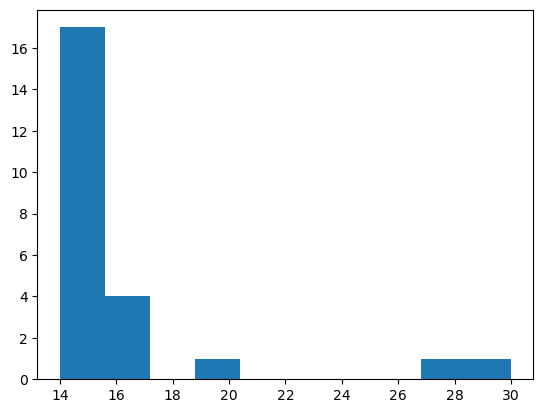

In [184]:
df1 = df[df['Last_Action'].dt.days >= 14] #df['Last_Action'].dt.days // 1]
plt.hist(df1['Last_Action'].dt.days)